### Imports and set path to local mavenn

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from numpy.random import default_rng

import warnings
warnings.filterwarnings('ignore')

import sys
path_to_mavenn_local = '/Users/tareen/Desktop/Research_Projects/2020_mavenn_github/mavenn'
sys.path.insert(0,path_to_mavenn_local)

import mavenn
from mavenn.src.utils import get_example_dataset
from mavenn.src.utils import ge_plots_for_mavenn_demo
from mavenn.src.utils import onehot_encode_array, _generate_nbr_features_from_sequences, _generate_all_pair_features_from_sequences
from mavenn.src.utils import _center_matrix

import tensorflow as tf
import tensorflow.keras.backend as K

# Path being used:
mavenn.__path__

['/Users/tareen/Desktop/Research_Projects/2020_mavenn_github/mavenn/mavenn']

## Load model from file

In [2]:
GER = mavenn.load('model_files/gaussian_GB1_model')

In [3]:
GER.ge_noise_model_type

'Gaussian'

### Make predictions and compute latent phenotype values

In [4]:
# equalate g(phi) for continuous phi
phi_range = np.linspace(-9,2.3,1000)
y_hat_GE = GER.phi_to_yhat(phi_range)

# noise model that is used to get eta parameters
qs = GER.yhat_to_yq(y_hat_GE,q=np.array([0.16,0.84]))

Text(0.5, 1.0, 'Gaussian Likelihood')

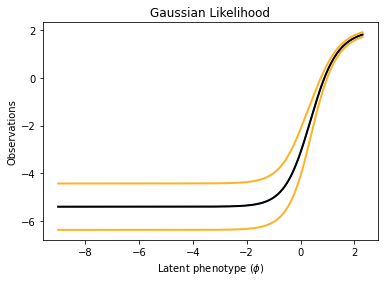

In [5]:
fig, ax = plt.subplots(1,1,figsize=(6,4))
ax.plot(phi_range,GER.phi_to_yhat(phi_range))
ax.plot(phi_range,GER.phi_to_yhat(phi_range),lw=2,label='$\hat{y}$',alpha=1.0,color='black')

for q_index in range(qs.shape[1]):
    ax.plot(phi_range,qs[:,q_index].ravel(),color='orange',lw=2,alpha=0.85,label='$\hat{y} \pm \sigma(\hat{y})$')

ax.set_ylabel('Observations')
ax.set_xlabel('Latent phenotype ($\phi$)')
ax.set_title(GER.ge_noise_model_type+' Likelihood')    

In [6]:
GER.get_gpmap_parameters()

,name,value
0,theta_0,4.017915
1,theta_0:A,0.093001
2,theta_0:C,-0.047160
3,theta_0:D,-0.101276
4,theta_0:E,-0.073173
...,...,...
1096,theta_54:S,0.111016
1097,theta_54:T,0.134008
1098,theta_54:V,0.029256
1099,theta_54:W,0.102657


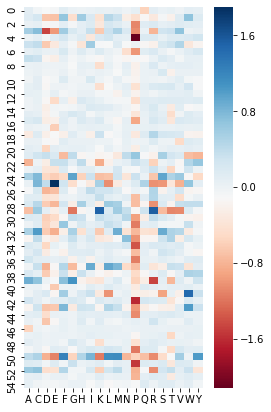

In [7]:
import seaborn as sns
plt.figure(figsize=(4,7))
sns.heatmap(GER.get_gpmap_parameters()['value'][1:].values.reshape(55,20),
            xticklabels=GER.model.characters,
            cmap='RdBu')

In [8]:
GB1_test_data = pd.read_csv('GB1_test_data.csv',index_col=[0])
GB1_test_data.head()

,x_test,y_test
0,QYKLILNGKTLKGETTTEAVDAATAEKVFKQYANDNGVDPSWTYDD...,-5.462769
1,QYKLILNGKTLKGETTTEAVDAATAEKVFKQYAVDNGVAGEWTYDD...,-4.501484
2,QYKLILNGPTLKGETTTEAVDAATAEKVFKQYANDNGVGGEWTYDD...,-1.259925
3,QYKLILNGKTLKGETTTEAVDAATAEKPFHQYANDNGVDGEWTYDD...,-5.058220
4,QYKLIGNGKTLKGEETTEAVDAATAEKVFKQYANDNGVDGEWTYDD...,-2.361848


In [9]:
x_test = GB1_test_data['x_test'].values
y_test = GB1_test_data['y_test'].values

In [10]:
# predictions
y_hat = GER.x_to_yhat(x_test)

# evaluate phi for sequences 
phi = GER.x_to_phi(x_test)

Text(0.5, 0, 'Predictions ($\\hat{y}$)')

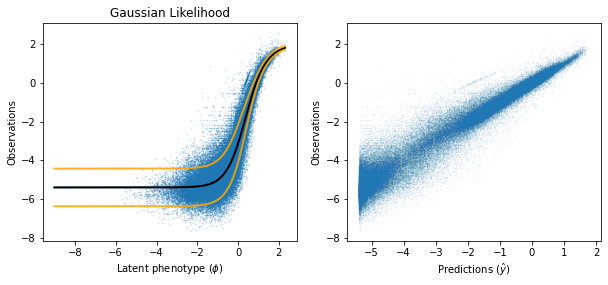

In [11]:
fig, ax = plt.subplots(1,2,figsize=(10,4))

ax[0].scatter(phi,y_test,s=0.25,alpha=0.25)
ax[0].plot(phi_range,GER.phi_to_yhat(phi_range))
ax[0].plot(phi_range,GER.phi_to_yhat(phi_range),lw=2,label='$\hat{y}$',alpha=1.0,color='black')

for q_index in range(qs.shape[1]):
    ax[0].plot(phi_range,qs[:,q_index].ravel(),color='orange',lw=2,alpha=0.85,label='$\hat{y} \pm \sigma(\hat{y})$')

ax[0].set_ylabel('Observations')
ax[0].set_xlabel('Latent phenotype ($\phi$)')
ax[0].set_title(GER.ge_noise_model_type+' Likelihood')    

ax[1].scatter(y_hat,y_test,s=0.1,alpha=0.1)
ax[1].set_ylabel('Observations')
ax[1].set_xlabel('Predictions ($\hat{y}$)')


In [12]:
GB1_train_data = pd.read_csv('GB1_train_data.csv',index_col=[0])
GB1_train_data.head()

,x_train,y_train
0,QYKLILNGKFLKGETTTIAVDAATAEKVFKQYANDNGVDGEWTYDD...,-0.404259
1,QYKLILNGKTLKGETTTEAVAAATAEKVFKQYANDNGADGEWTYDD...,-2.884137
2,QLKLILNGKTLKGETTTEAVDAATAEKVFKQYANDNGVDGEWTHDD...,-4.167247
3,QYKLILNGKTLKWETTTEAVDAATAEKVFKQYANDNGVDGEWTYDD...,-6.068821
4,QYKLILNGKTLKGETTTEAVDAATAEDVFKQYANDNGVDGEWTWDD...,-5.300950
